In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./dataset/data.csv')

print("Loaded dataset")

Loaded dataset


In [3]:
def remove_outliers(series):
    # Calculate the first quartile (Q1), third quartile (Q3), and IQR
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Remove outliers from the series
    # Cleaned_series = [x for x in series if lower_bound <= x <= upper_bound]
    
    return lower_bound, upper_bound

In [4]:
model_features = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'surge_applied']
X = data[model_features]
y = data['fare']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=101)

print(f"Number of samples for training set: {X_train.shape}")
print(f"Number of samples for test set: {X_test.shape}")

Number of samples for training set: (146771, 4)
Number of samples for test set: (62902, 4)


In [5]:
X_train['trip_duration_lb'], X_train['trip_duration_ub'] = remove_outliers(X_train['trip_duration'])
X_train['distance_traveled_lb'], X_train['distance_traveled_ub'] = remove_outliers(X_train['distance_traveled'])
X_train = X_train.loc[(X_train['trip_duration'] <= X_train['trip_duration_ub']) & (X_train['distance_traveled'] <= X_train['distance_traveled_ub'])]

In [6]:
X_train = X_train[model_features]

In [7]:
y_train = y_train[X_train.index]

In [8]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=101)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=101)

In [9]:
y_pred = model.predict(X_test)

In [10]:
comparing_dump_df = pd.DataFrame(y_test)
comparing_dump_df['Predicted Fare'] = y_pred
comparing_dump_df

,fare,Predicted Fare
160516,180.00,184.207839
193984,195.00,191.613847
170682,86.25,82.304714
205636,262.50,199.856938
149651,63.75,64.240445
...,...,...
84947,183.75,175.793704
4384,390.00,199.856938
159590,243.75,200.186786
190532,75.00,167.397164


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Model Score: {score:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Model Score: 0.5559
Mean Absolute Error (MAE): 13.3912
Mean Squared Error (MSE): 3108.0473


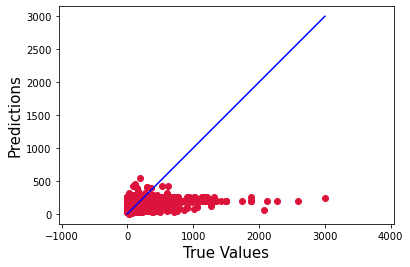

In [138]:
true_value = y_test
predicted_value = y_pred 

plt.scatter(true_value, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [139]:
joblib.dump(model, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']